# 术语
这个笔记本用于展示不同种类的图像和分割图像，以解释常用术语。

In [1]:
from skimage.io import imread, imshow
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview
import numpy as np

## 强度图像
我们从显微镜常常产生的强度图像开始。

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


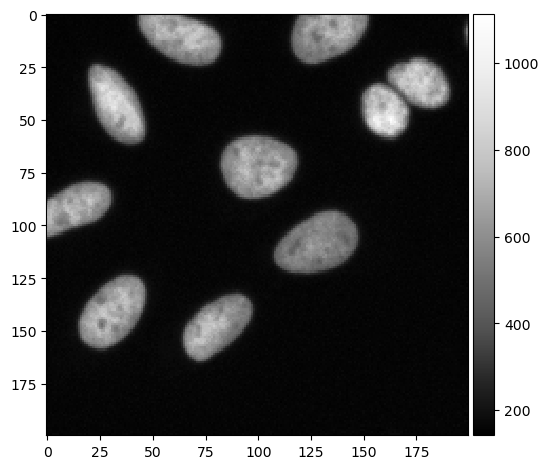

In [2]:
input_image = imread("../../data/BBBC022/IXMtest_A02_s9.tif")[:,:,0]

cropped_image = input_image[0:200, 200:400]

imshow(cropped_image, cmap='Greys_r')

## 二值图像
基本的分割算法会产生二值图像。它们的特点是只有两种不同的强度，如`0`和`1`。

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
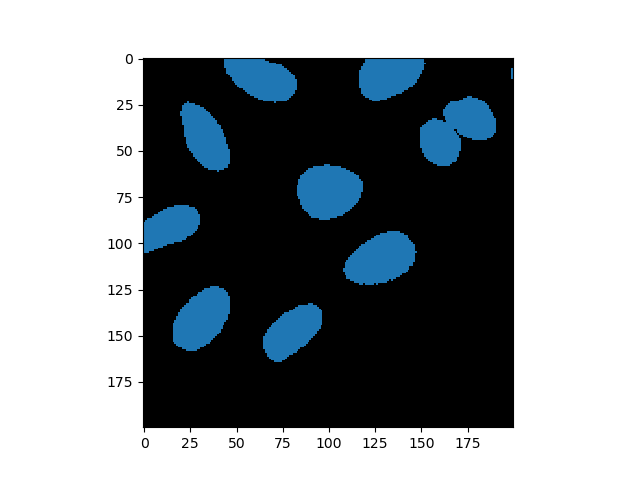

In [3]:
binary_image = nsbatwm.threshold_otsu(cropped_image)
binary_image

## 实例分割
如果每个单独的对象都有自己的强度/颜色，我们称之为实例分割标签图像。实例用整数标记。这个图像中的最大强度（标签）通常对应于对象的数量。

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
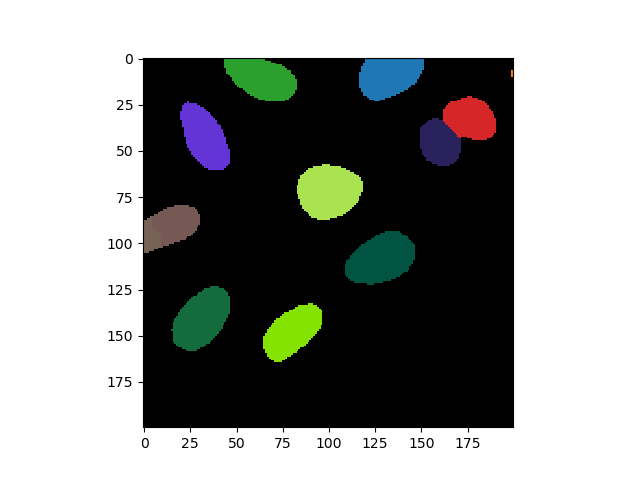

In [4]:
instance_segmentation = nsbatwm.voronoi_otsu_labeling(cropped_image, 
                                        spot_sigma=5, 
                                        outline_sigma=1)

instance_segmentation

当你在本地运行这个笔记本时，你可以用鼠标悬停在图像上并检查像素强度。

In [5]:
import stackview
stackview.picker(instance_segmentation)

## 语义分割
语义分割标签图像可以有两个以上的标签，通常标记具有相同含义的像素区域，例如：细胞核、核膜和背景。

StackViewNDArray([[1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  ...,
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1]], dtype=int64)
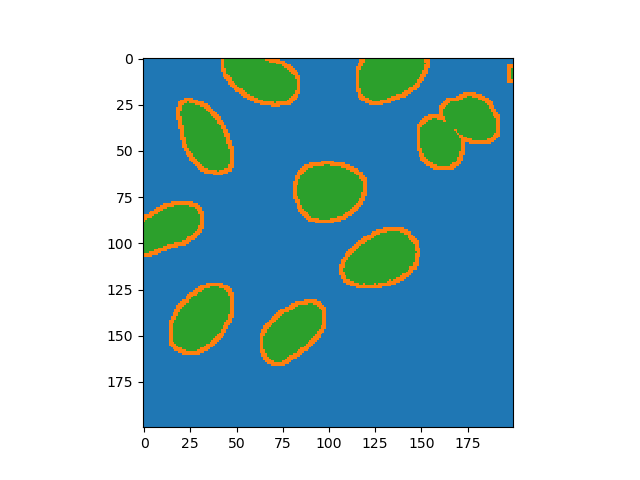

In [6]:
semantic_segmentation = binary_image + nsbatwm.maximum_filter(binary_image).astype(np.uint32) + 1
semantic_segmentation

## 稀疏标注
标注的标签图像通常由人工绘制。在本地执行这个笔记本时，你可以绘制一些标注。如果你精确地标注几个细胞核，你就创建了一个稀疏的细胞核标注。按住ALT键可以擦除标注。

In [7]:
sparse_label_annotation = np.zeros_like(cropped_image, dtype=np.uint32)
stackview.annotate(cropped_image, sparse_label_annotation)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
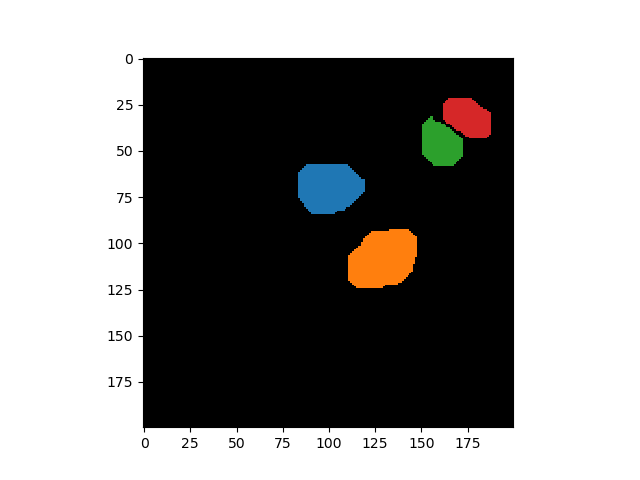

In [8]:
stackview.insight(sparse_label_annotation)

你也可以创建一个稀疏的语义标注，例如，通过标注细胞核内的一些像素和背景中的一些像素。

In [9]:
sparse_semantic_annotation = np.zeros_like(cropped_image, dtype=np.uint32)
stackview.annotate(cropped_image, sparse_semantic_annotation)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
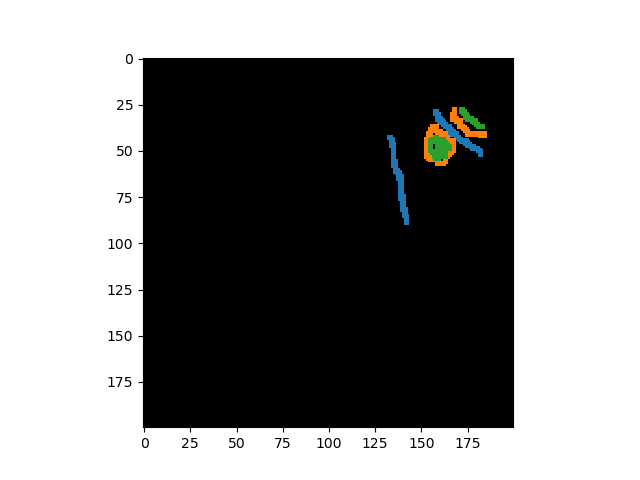

In [10]:
stackview.insight(sparse_semantic_annotation)